## Predatory Inclusion in Non-Profit and For-Profit Online Education
### By Christian Michael Smith, Amber D. Villalobos (equal authors), Laura T. Hamilton, and Charlie Eaton

### Code by Christian Smith

### Estimation for Tables 3 and 5

In [ ]:
use data/d_t3_t5_ipeds_scorecard, clear

In [ ]:
describe, size

In [ ]:
set more off

In [ ]:
**********(A) SETUP DATA FOR ANALYSIS**********

*Keep only 4yr institutions
keep if iclevel==1

*Drop observations from the 2020-2021 academic year 
drop if year==2020

*Define sets of control variables
	*Control variable set when dependent variable is student body demographic in nature
global controls_demog "i.year i.control i.hdegofr1 i.locale i.obereg hbcu"
	*Control variable set when dependent variable is a student outcome
global controls_outcome "i.year logenrl blackpct_u latinxpct_u aianpct_u asiapct_u malepct_u upgrntp acceptrate i.control i.hdegofr1 i.locale i.obereg hbcu"

In [ ]:
**********(B) ESTIMATE %ONLINE --> STUDENT DEMOGRAPHICS RELATIONSHIPS**********

foreach demogvar in upgrntp blackpct_u {
	foreach control in allcontrols forprofit nonprofit {
		qui reg `demogvar' pctonline10 $controls_demog if `control'==1, vce(cluster unitid)
	}
}

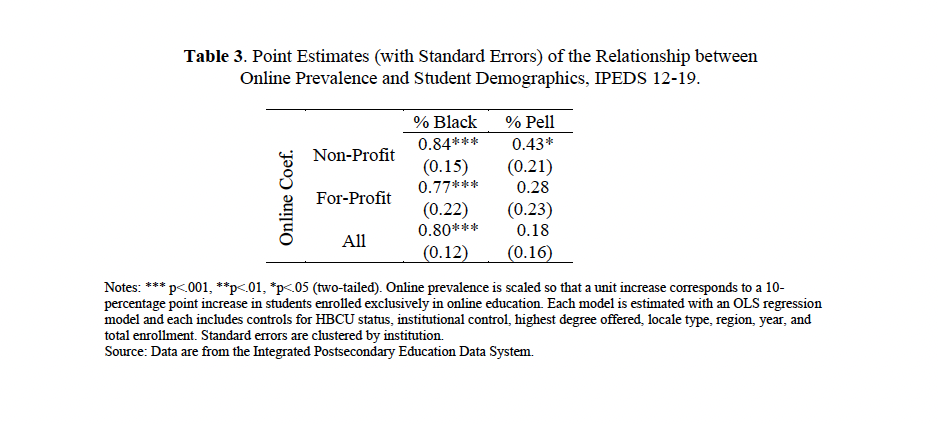

In [ ]:
**********(B) ESTIMATE %ONLINE --> STUDENT OUTCOMES RELATIONSHIPS**********

foreach outcomevar in ret_pcf gradrate6 totloan_a bbrr2_fed_ug_dflt bbrr2_fed_ug_dlnq bbrr2_fed_ug_fbr bbrr2_fed_ug_noprog bbrr2_fed_ug_discharge bbrr2_fed_ug_dfr  bbrr2_fed_ug_makeprog bbrr2_fed_ug_paidinfull {
	foreach control in allcontrols forprofit nonprofit {
		qui reg `outcomevar' pctonline10 $controls_outcome if `control'==1, vce(cluster unitid)
	}
}

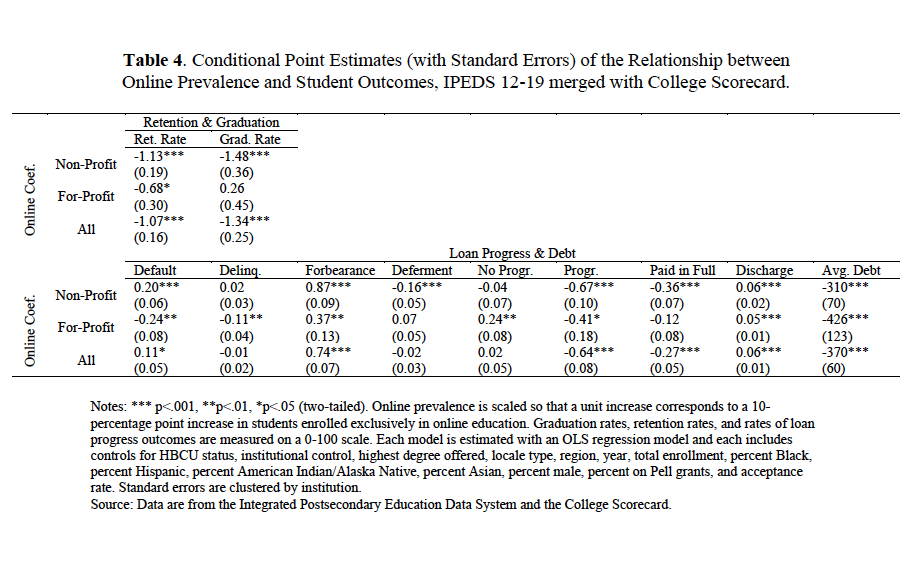